Inspired from [Henrik Lindberg's post](https://www.reddit.com/r/dataisbeautiful/comments/6m0wo7/peak_time_for_sports_and_leisure_oc/djy1i3h/) and his original [code](https://github.com/halhen/viz-pub/blob/master/sports-time-of-day/2_gen_chart.R) in R

In [1]:
%pylab inline
import seaborn as sns
import pandas as pd

plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Extracted from https://github.com/halhen/viz-pub/blob/master/sports-time-of-day/2_gen_chart.R#L33
df_act = pd.read_csv('data/activity2.csv')
df_act['time'] = df_act['time']/60.0 # In hours
df_act.head()

,activity,time,p,p_peak,p_smooth
0,Using cardiovascular equipment,24.000000,0.000106,0.079316,0.079316
1,Using cardiovascular equipment,24.083333,0.000076,0.057084,0.059767
2,Using cardiovascular equipment,24.166667,0.000057,0.042900,0.046373
3,Using cardiovascular equipment,24.250000,0.000052,0.039133,0.039216
4,Using cardiovascular equipment,24.333333,0.000047,0.035614,0.027964


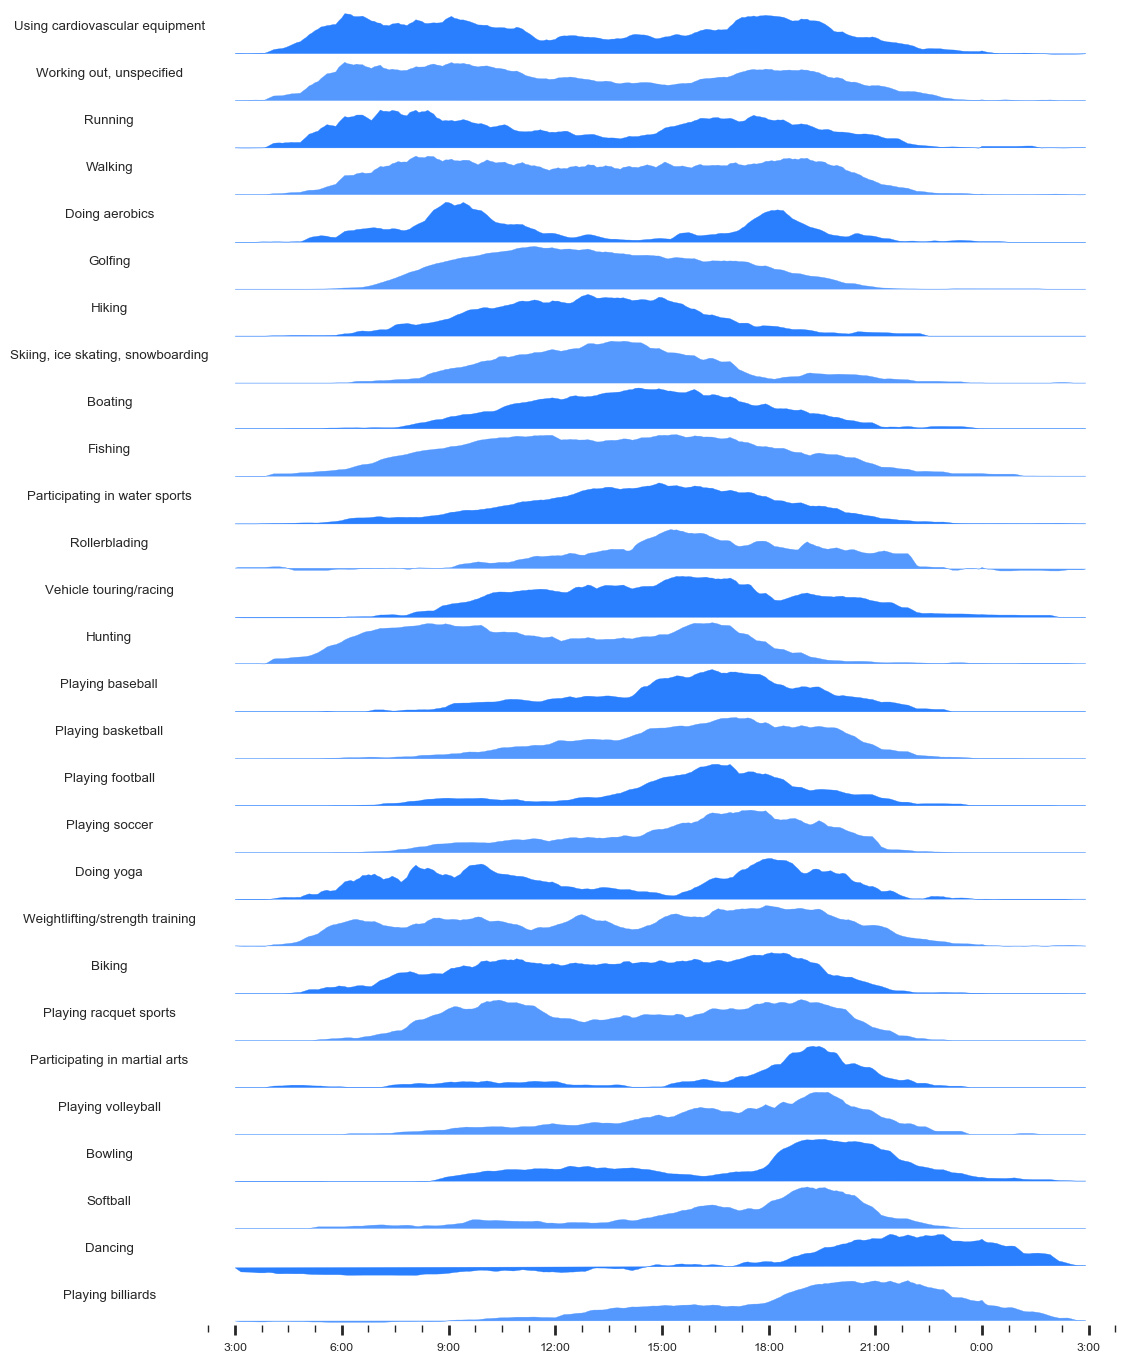

In [3]:
sns.set_context('paper', font_scale=1.1)
fig = plt.figure(figsize=(20,20))
g = sns.FacetGrid(df_act, row='activity', size=0.5, aspect=20)
g = (g.map(plt.fill, 'time', 'p_smooth', color='#2A7FFF', clip_on=False, alpha=1)).despine(left=True, bottom=True)
g.set(yticks=[])
g.set(yticklabels=[])
g.set(title='')
g.set(xlabel='')
g.set(ylabel='')
colors = ['#2A7FFF', '#5599FF']
for index, ax in enumerate(g.axes.ravel()):
    ax.set_ylabel(g.row_names[index], rotation=0, labelpad=60)
    ax.patches[0].set_color(colors[index%2])
    ax.set_clip_on(False)
    

ax = g.axes.ravel()[-1]
ax.minorticks_on()
ax.tick_params('both', length=7, width=2, which='major')
ax.tick_params('both', length=5, width=1, which='minor')
ax.fill(color='red')
ax.set_clip_on(False)

g.set(xticks=range(int(df_act['time'].min()), 28, 3))
xlabels = map( lambda x : '{}:00'.format(x % 24), range(int(df_act['time'].min()), 28, 3))
g.set_xticklabels(xlabels)

#plt.tight_layout()
plt.subplots_adjust(hspace=0)

plt.show()
